In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w,true_b = torch.ones((num_inputs,1)) * 0.01,0.05

train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)

test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data,batch_size)

In [3]:
# 从零开始实现
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b =  torch.zeros(1,requires_grad=True)
    return [w,b]

In [12]:
# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) /2

In [15]:
# 定义训练代码实现
def train(lamdb):
    w,b = init_params()
    net,loss = lambda x:d2l.linreg(x,w,b),d2l.squared_loss
    num_epochs,lr = 100,0.003
    animator = d2l.Animator(xlabel="epochs",ylabel="loss",yscale='log',xlim=[5,num_epochs],legend=["train","test"])

    for epoch in range(num_epochs):
        for x,y in train_iter:
            l = loss(net(x),y) + lamdb * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch +1) %5 == 0:
            animator.add(epoch + 1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print("w的L2：" ,torch.norm(w).item())

w的L2： 14.355881690979004


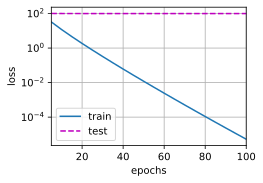

In [16]:
train(lamdb = 0)

w的L2： 0.345594584941864


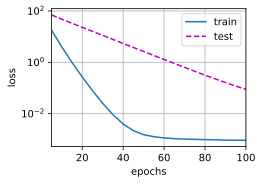

In [17]:
train(lamdb=3)

In [21]:
# 简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs,lr = 100,0.003
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay':wd},
        {"params":net[0].bias}
         ],lr =lr)
    animator = d2l.Animator(xlabel="epochs",ylabel="loss",yscale="log",xlim=[5,num_epochs],legend=["train","test"])
    for epoch in range(num_epochs):
        for x,y in train_iter:
            trainer.zero_grad()
            l = loss(net(x),y)
            l.mean().backward()
            trainer.step()
        if (epoch +1)%5 == 0:
            animator.add(epoch +1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print("w的L2:",net[0].weight.norm().item())
    

w的L2: 13.807705879211426


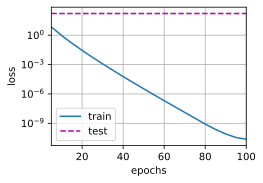

In [22]:
train_concise(0)

w的L2: 0.35488736629486084


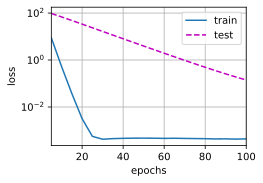

In [23]:
train_concise(3)